## Doubts??

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100

In [3]:
mat = pd.read_csv("../exercise/matches.csv")

In [4]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
mat['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Abu Dhabi           7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [6]:
mat['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [4]:
temp = mat.copy()

In [5]:
d = {"chandigarh": "punjab", "rajkot": "gujrat", "jaipur": "rajasthan", "ahmedabad": "gujrat", 'kochi': 'kerala',
    'mohali': 'punjab'}

In [6]:
def change(city):
    if city in d:
        return d[city.lower()]
    return city

In [7]:
temp['city'] = temp['city'].apply(change)

In [8]:
temp['city'][0]

'Hyderabad'

In [9]:
temp['city'] = temp['city'].fillna("")
temp['winner'] = temp['winner'].fillna("")

In [10]:
result = []
for i in temp.index:
    if temp['city'][i].lower() in temp['winner'][i].lower():
        result.append(True)
    else:
        result.append(False)

In [11]:
temp[pd.Series(result, index=temp.index)]['winner'].value_counts()

Mumbai Indians                 53
Kolkata Knight Riders          45
Chennai Super Kings            42
Sunrisers Hyderabad            32
Royal Challengers Bangalore    31
Delhi Daredevils               28
Rising Pune Supergiant          5
Pune Warriors                   4
Delhi Capitals                  4
Kochi Tuskers Kerala            2
Kings XI Punjab                 1
Name: winner, dtype: int64

In [12]:
from generate_color import colors

In [14]:
title = {"fontsize":25, "color":"#12abcd", "fontfamily":"monospace"}
label = {"fontsize":15, "color":"#abcd12", "fontfamily":"monospace"}

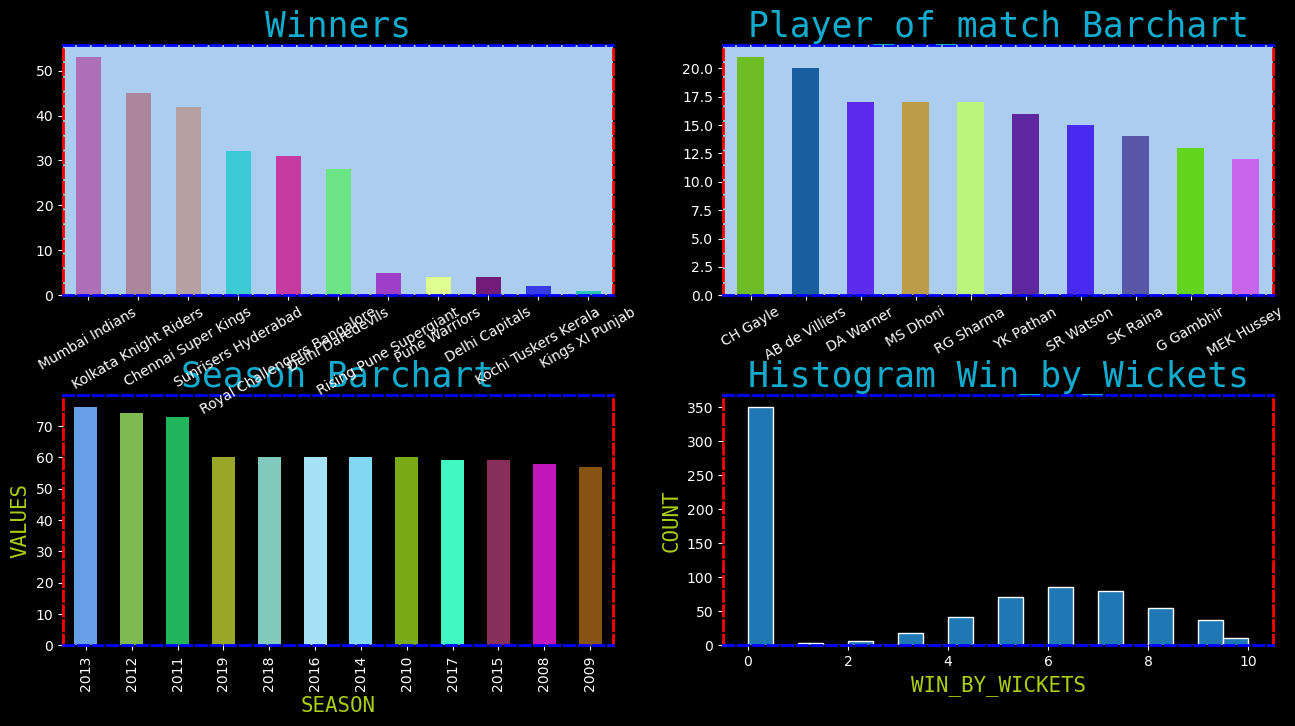

In [17]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.6, 0, 0.5, 0.5], facecolor="black")
#ax = fig.add_axes([0, 0.6, 1.2, 0.05], facecolor="white")
ax3 = fig.add_axes([0.6, 0.7, 0.5, 0.5], facecolor="#abcdef")
ax4 = fig.add_axes([0, 0.7, 0.5, 0.5], facecolor="#abcdef")
ax2.hist(mat['win_by_wickets'], bins=20, ec='w')
mat['player_of_match'].value_counts()[:10].plot(kind="bar", ax=ax3, color=[colors() for i in range(12)])
mat['season'].value_counts().plot(kind="bar", ax=ax1, color=[colors() for i in range(12)])
temp[pd.Series(result, index=temp.index)]['winner'].value_counts().plot(kind="bar", ax=ax4, color=[colors() for i in range(12)])
titles = ['Season Barchart', 'Histogram Win_by_Wickets', "Player_of_match Barchart", "Winners"]
axes = [ax1, ax2, ax3, ax4]
for i in range(len(axes)):
    axes[i].set_title(titles[i], fontdict=title)
    axes[i].tick_params(labelcolor="white", labelsize=10, color="white")
    for side in ['left', 'right', 'top', 'bottom']:
        color = 'red' if side in ['left', 'right'] else 'blue'
        axes[i].spines[side].set_color(color)
        axes[i].spines[side].set_lw(2)
        axes[i].spines[side].set_ls("--")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=30)
ax1.set_xlabel("SEASON", fontdict=label)
ax1.set_ylabel("VALUES", fontdict=label)
ax2.set_xlabel("WIN_BY_WICKETS", fontdict=label)
ax2.set_ylabel("COUNT", fontdict=label)
plt.show()

In [18]:
mat

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#### How many times team win by run and how many times team win by wickets

In [24]:
r = (mat['win_by_runs'] != 0).sum()

In [25]:
w = (mat['win_by_wickets'] != 0).sum()

In [22]:
mat.shape

(756, 18)

In [23]:
337 + 406

743

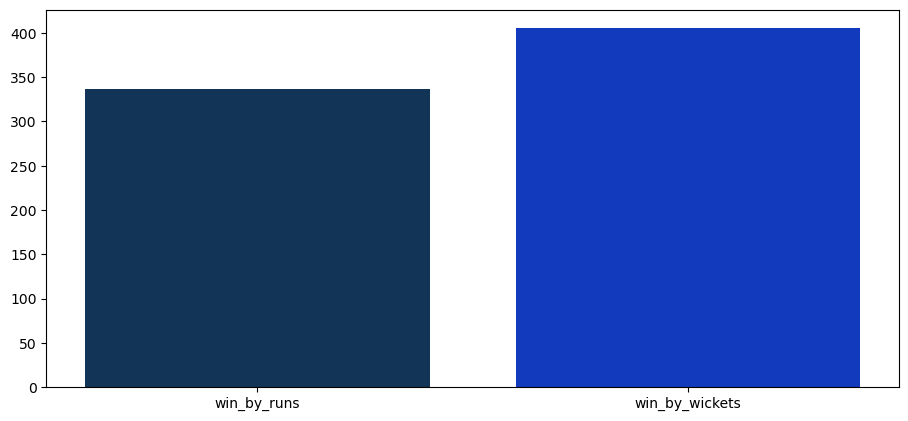

In [27]:
labels = ['win_by_runs', 'win_by_wickets']
values = [r, w]
plt.bar(labels, values, color=['#123456', '#123abc'])
plt.show()

#### how many times team wins if it wins the toss 

In [29]:
(mat['winner'] == mat['toss_winner']).sum()

393

In [30]:
mat.shape

(756, 18)

In [33]:
mat.shape[0] - (mat['winner'] == mat['toss_winner']).sum()

363

In [34]:
(mat['winner'] != mat['toss_winner']).sum()

363

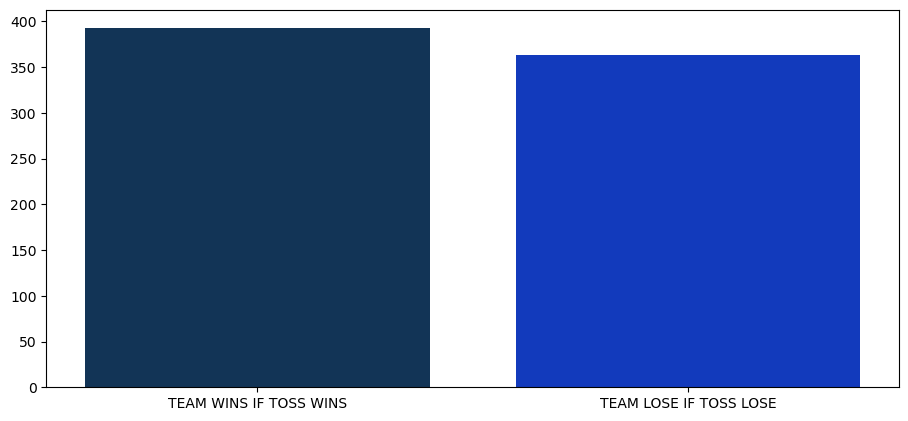

In [35]:
labels = ['TEAM WINS IF TOSS WINS', 'TEAM LOSE IF TOSS LOSE']
values = [(mat['winner'] == mat['toss_winner']).sum(), (mat['winner'] != mat['toss_winner']).sum()]
plt.bar(labels, values, color=['#123456', '#123abc'])
plt.show()

In [37]:
mat['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [44]:
index = mat[mat['result'] == 'tie']['winner'].index

In [46]:
mat.loc[index, 'winner'] = "no winner"

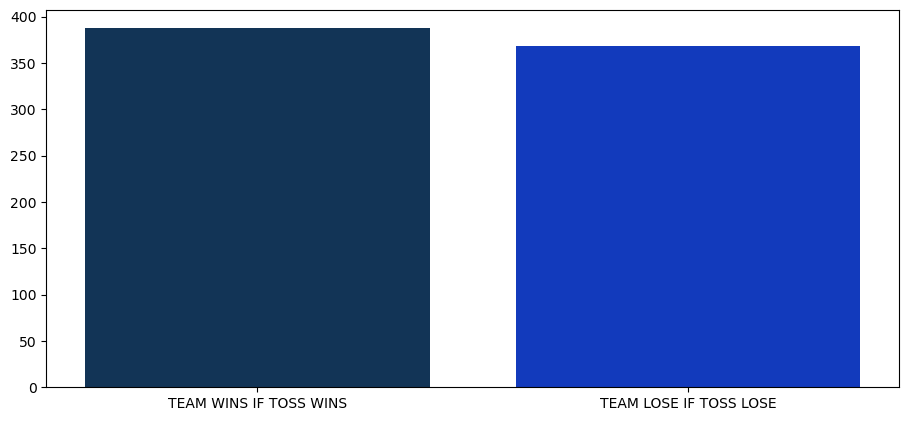

In [47]:
labels = ['TEAM WINS IF TOSS WINS', 'TEAM LOSE IF TOSS LOSE']
values = [(mat['winner'] == mat['toss_winner']).sum(), (mat['winner'] != mat['toss_winner']).sum()]
plt.bar(labels, values, color=['#123456', '#123abc'])
plt.show()

In [48]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### how many times a team wins if it choose fielding

In [51]:
mat[mat['toss_decision'] == "field"]['winner'].value_counts()

Mumbai Indians                 64
Kings XI Punjab                59
Royal Challengers Bangalore    57
Kolkata Knight Riders          57
Chennai Super Kings            48
Rajasthan Royals               40
Delhi Daredevils               38
Sunrisers Hyderabad            37
Deccan Chargers                15
Gujarat Lions                  11
Rising Pune Supergiant         10
Delhi Capitals                  7
Kochi Tuskers Kerala            6
no winner                       5
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [52]:
((mat['toss_decision'] == 'field')&(mat['winner'] == mat['toss_winner'])).sum()

256

In [54]:
mat[(mat['toss_decision'] == 'field')&(mat['winner'] == mat['toss_winner'])]['winner'].value_counts()

Kolkata Knight Riders          38
Royal Challengers Bangalore    31
Mumbai Indians                 31
Kings XI Punjab                28
Chennai Super Kings            27
Rajasthan Royals               27
Delhi Daredevils               24
Sunrisers Hyderabad            15
Gujarat Lions                  10
Deccan Chargers                 8
Rising Pune Supergiant          5
Delhi Capitals                  5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [66]:
mat[mat['toss_decision'] == "field"].groupby("winner")['id'].count()

winner
Chennai Super Kings            48
Deccan Chargers                15
Delhi Capitals                  7
Delhi Daredevils               38
Gujarat Lions                  11
Kings XI Punjab                59
Kochi Tuskers Kerala            6
Kolkata Knight Riders          57
Mumbai Indians                 64
Pune Warriors                   3
Rajasthan Royals               40
Rising Pune Supergiant         10
Rising Pune Supergiants         3
Royal Challengers Bangalore    57
Sunrisers Hyderabad            37
no winner                       5
Name: id, dtype: int64

### how many times a team wins if it choose batting

In [67]:
((mat['toss_decision'] == 'bat')&(mat['winner'] == mat['toss_winner'])).sum()

132